<a href="https://colab.research.google.com/github/Sushmitha-Katti/ERA/blob/main/Session%207%20-%20In-Depth%20Coding%20Practice/Drill3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [47]:
# To reload the disk files
%load_ext autoreload
%autoreload 2

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
# Train Phase transformations
train_transforms = transforms.Compose([

                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [49]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [50]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


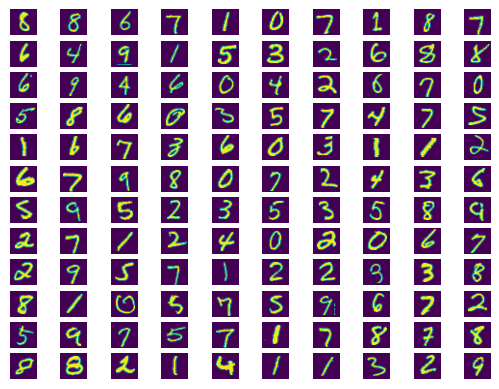

In [53]:
from utils import plot_images
dataiter = iter(train_loader)
images, labels = next(dataiter)
plot_images(120, images)

# Model Params


In [55]:
from models.model3 import Model3
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model3().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 26, 26]             108
              ReLU-2           [-1, 12, 26, 26]               0
       BatchNorm2d-3           [-1, 12, 26, 26]              24
         Dropout2d-4           [-1, 12, 26, 26]               0
            Conv2d-5           [-1, 12, 24, 24]           1,296
              ReLU-6           [-1, 12, 24, 24]               0
       BatchNorm2d-7           [-1, 12, 24, 24]              24
         Dropout2d-8           [-1, 12, 24, 24]               0
         MaxPool2d-9           [-1, 12, 12, 12]               0
           Conv2d-10           [-1, 14, 10, 10]           1,512
             ReLU-11           [-1, 14, 10, 10]               0
      BatchNorm2d-12           [-1, 14, 10, 10]              28

# Model Training and Testing

In [56]:

from train_test import TrainTest
train_test_instance = TrainTest()

model =  Model3().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train_test_instance.train(model, device, train_loader, optimizer, epoch)
    train_test_instance.test(model, device, test_loader)

EPOCH: 1


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=0.12753118574619293 Batch_id=468 Accuracy=82.77: 100%|██████████| 469/469 [00:22<00:00, 20.42it/s]



Test set: Average loss: 0.0896, Accuracy: 9763/10000 (97.63%)

EPOCH: 2


Loss=0.14874249696731567 Batch_id=468 Accuracy=96.37: 100%|██████████| 469/469 [00:17<00:00, 27.31it/s]



Test set: Average loss: 0.0452, Accuracy: 9858/10000 (98.58%)

EPOCH: 3


Loss=0.04802164062857628 Batch_id=468 Accuracy=97.17: 100%|██████████| 469/469 [00:18<00:00, 25.78it/s]



Test set: Average loss: 0.0373, Accuracy: 9883/10000 (98.83%)

EPOCH: 4


Loss=0.0907210111618042 Batch_id=468 Accuracy=97.61: 100%|██████████| 469/469 [00:17<00:00, 27.42it/s]



Test set: Average loss: 0.0346, Accuracy: 9892/10000 (98.92%)

EPOCH: 5


Loss=0.04039740934967995 Batch_id=468 Accuracy=97.88: 100%|██████████| 469/469 [00:18<00:00, 25.63it/s]



Test set: Average loss: 0.0283, Accuracy: 9909/10000 (99.09%)

EPOCH: 6


Loss=0.10948701947927475 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:17<00:00, 27.08it/s]



Test set: Average loss: 0.0304, Accuracy: 9905/10000 (99.05%)

EPOCH: 7


Loss=0.07201460003852844 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:18<00:00, 25.50it/s]



Test set: Average loss: 0.0278, Accuracy: 9909/10000 (99.09%)

EPOCH: 8


Loss=0.06281391531229019 Batch_id=468 Accuracy=98.18: 100%|██████████| 469/469 [00:17<00:00, 27.03it/s]



Test set: Average loss: 0.0258, Accuracy: 9915/10000 (99.15%)

EPOCH: 9


Loss=0.16289682686328888 Batch_id=468 Accuracy=98.29: 100%|██████████| 469/469 [00:18<00:00, 26.03it/s]



Test set: Average loss: 0.0262, Accuracy: 9920/10000 (99.20%)

EPOCH: 10


Loss=0.09399828314781189 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:17<00:00, 27.03it/s]



Test set: Average loss: 0.0241, Accuracy: 9916/10000 (99.16%)

EPOCH: 11


Loss=0.009137489832937717 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:19<00:00, 24.38it/s]



Test set: Average loss: 0.0235, Accuracy: 9920/10000 (99.20%)

EPOCH: 12


Loss=0.05211818590760231 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:17<00:00, 27.20it/s]



Test set: Average loss: 0.0250, Accuracy: 9926/10000 (99.26%)

EPOCH: 13


Loss=0.017200075089931488 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:17<00:00, 26.42it/s]



Test set: Average loss: 0.0232, Accuracy: 9934/10000 (99.34%)

EPOCH: 14


Loss=0.05195765569806099 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:17<00:00, 27.05it/s]



Test set: Average loss: 0.0224, Accuracy: 9927/10000 (99.27%)

EPOCH: 15


Loss=0.030351005494594574 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:17<00:00, 26.25it/s]



Test set: Average loss: 0.0225, Accuracy: 9922/10000 (99.22%)

EPOCH: 16


Loss=0.14561475813388824 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:17<00:00, 26.96it/s]



Test set: Average loss: 0.0227, Accuracy: 9925/10000 (99.25%)

EPOCH: 17


Loss=0.016254693269729614 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:17<00:00, 26.23it/s]



Test set: Average loss: 0.0209, Accuracy: 9931/10000 (99.31%)

EPOCH: 18


Loss=0.03540433198213577 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:17<00:00, 26.99it/s]



Test set: Average loss: 0.0220, Accuracy: 9922/10000 (99.22%)

EPOCH: 19


Loss=0.07733143866062164 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:18<00:00, 25.88it/s]



Test set: Average loss: 0.0218, Accuracy: 9932/10000 (99.32%)

EPOCH: 20


Loss=0.06268693506717682 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:17<00:00, 27.17it/s]



Test set: Average loss: 0.0235, Accuracy: 9926/10000 (99.26%)



# Loss and Accuaracy

Text(0.5, 1.0, 'Test Accuracy')

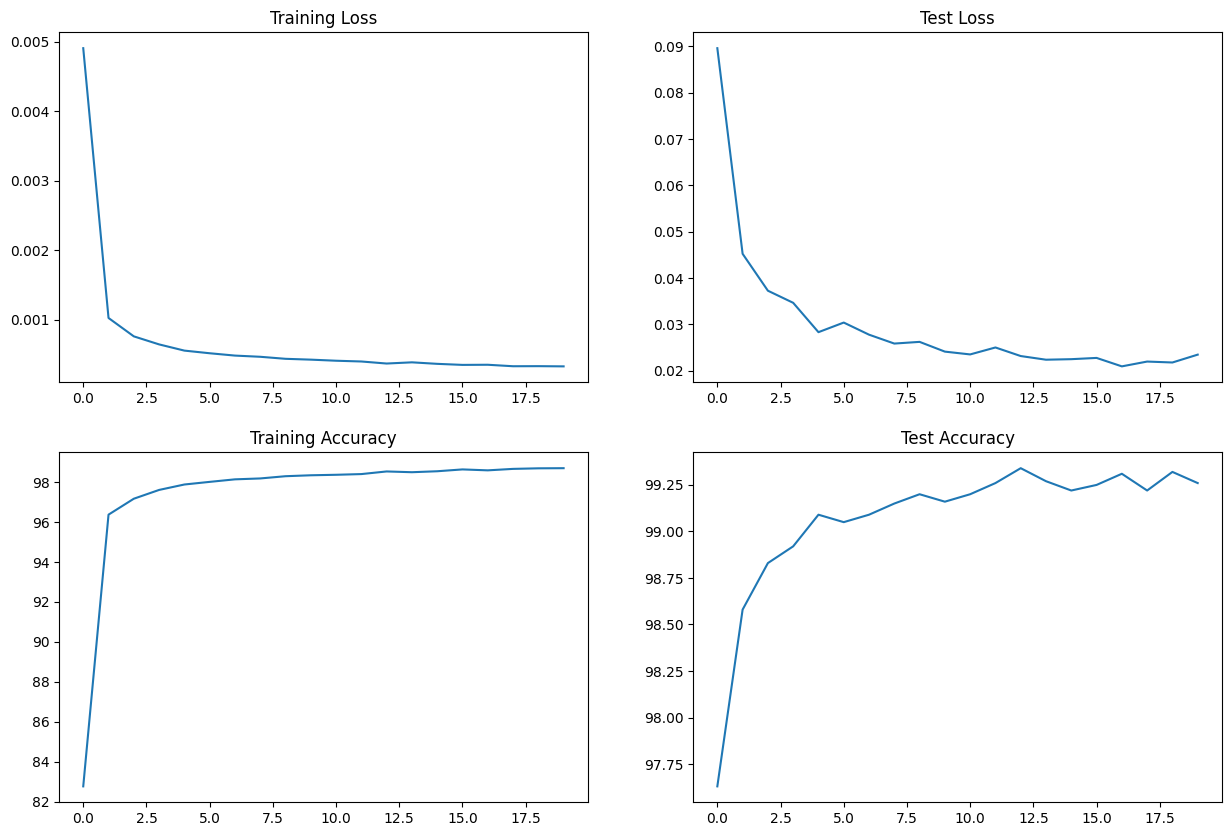

In [57]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_test_instance.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_test_instance.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(train_test_instance.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(train_test_instance.test_acc)
axs[1, 1].set_title("Test Accuracy")